In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
X = df.drop(columns=['not.fully.paid'])
y = df['not.fully.paid']
X.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 972.9+ KB


In [6]:
X.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec'],
      dtype='object')

In [7]:
y.value_counts()

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

## 1 is defaulter

<Axes: xlabel='not.fully.paid', ylabel='count'>

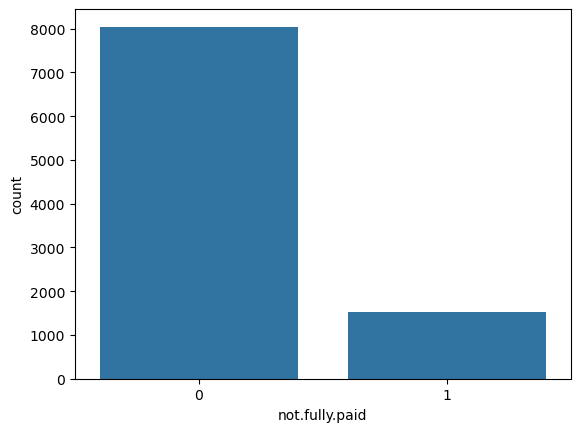

In [8]:
sns.countplot( x=y)

## lets try without SMOTE or class weights

### Encoding categorical features

In [9]:
from sklearn.preprocessing import  MinMaxScaler

In [10]:
X = pd.get_dummies(
    X,
    columns=['purpose'],
    drop_first=True
)


In [11]:
bool_cols = X.select_dtypes(include='bool').columns

X[bool_cols] = X[bool_cols].astype(int)

X.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1,0,0,0,0,0


## Splitting

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.2, stratify=y,random_state=42)
X_train.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
6381,1,0.1426,548.90,11.362103,12.71,687,5264.041667,16799,74.7,1,1,0,1,0,0,0,0,0
7589,1,0.0751,155.55,11.041321,12.75,737,5160.000000,11757,42.6,0,0,0,1,0,0,0,0,0
465,1,0.0983,136.00,10.778956,11.93,717,6329.041667,19708,37.1,0,1,0,0,1,0,0,0,0
5343,1,0.1357,339.69,11.608236,16.12,687,3330.000000,1584,49.5,1,0,0,0,0,0,0,0,0
8016,0,0.1312,438.78,11.654425,10.33,662,660.000000,0,0.0,4,0,0,0,1,0,0,0,0


In [14]:
y_train.value_counts()

not.fully.paid
0    6436
1    1226
Name: count, dtype: int64

In [15]:
y_test.value_counts()

not.fully.paid
0    1609
1     307
Name: count, dtype: int64

## Scaling

In [16]:
scaler = MinMaxScaler()

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7662 entries, 6381 to 4303
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               7662 non-null   int64  
 1   int.rate                    7662 non-null   float64
 2   installment                 7662 non-null   float64
 3   log.annual.inc              7662 non-null   float64
 4   dti                         7662 non-null   float64
 5   fico                        7662 non-null   int64  
 6   days.with.cr.line           7662 non-null   float64
 7   revol.bal                   7662 non-null   int64  
 8   revol.util                  7662 non-null   float64
 9   inq.last.6mths              7662 non-null   int64  
 10  delinq.2yrs                 7662 non-null   int64  
 11  pub.rec                     7662 non-null   int64  
 12  purpose_credit_card         7662 non-null   int64  
 13  purpose_debt_consolidation  7662 no

In [18]:
cols = X_train.columns
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

In [19]:
X_train.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
6381,1.0,0.528133,0.585221,0.575125,0.424232,0.348837,0.291181,0.013914,0.627731,0.030303,0.076923,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7589,1.0,0.096547,0.153519,0.526760,0.425567,0.581395,0.285222,0.009738,0.357983,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
465,1.0,0.244885,0.132062,0.487204,0.398198,0.488372,0.352178,0.016323,0.311765,0.000000,0.076923,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5343,1.0,0.484015,0.355613,0.612234,0.538051,0.348837,0.180411,0.001312,0.415966,0.030303,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8016,0.0,0.455243,0.464364,0.619198,0.344793,0.232558,0.027489,0.000000,0.000000,0.121212,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [21]:
X_train['purpose_credit_card'].value_counts() # 0 and 1 are left behind , not scaled to decimals...good

purpose_credit_card
0.0    6664
1.0     998
Name: count, dtype: int64

In [23]:
X_train.shape

(7662, 18)

## Model build

In [22]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers

In [25]:
model = Sequential([
    layers.Input(shape=(18,)),

    layers.Dense(128,activation='relu'),

    layers.Dense(64,activation='relu'),

    layers.Dense(32,activation='relu'), 

    layers.Dense(1,activation='sigmoid'),
])

In [26]:
model.compile(optimizer = 'adam',
             loss='binary_crossentropy',
             metrics=['accuracy','recall'])

In [27]:
# without class_weights
model.fit(X_train,y_train, batch_size=64,epochs=10)

Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8263 - loss: 0.4438 - recall: 0.0171    
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8400 - loss: 0.4164 - recall: 0.0000e+00  
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8400 - loss: 0.4144 - recall: 0.0000e+00   
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8400 - loss: 0.4130 - recall: 0.0000e+00 
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8399 - loss: 0.4125 - recall: 0.0000e+00   
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8404 - loss: 0.4114 - recall: 0.0033     
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8399 - loss: 0.4099 - recall: 0.0000e+00  
Epoch 8/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8404 - loss: 0.4109 - recall: 0.0065     
Epoch 9/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8401 - loss: 0.4108 - recall: 0.0049     
Epoch 10/10
120/120 ━━━

## recall being too low was expected...

In [29]:
X_test.shape

(1916, 18)

In [32]:
# recall=0

In [31]:
model.evaluate(X_test,y=y_test)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8398 - loss: 0.4102 - recall: 0.0000e+00  


[0.41016510128974915, 0.8397703766822815, 0.0]

## With class_weigths

In [33]:
class_weight = {0: 1, 1: 4}

model.fit(X_train,y_train, batch_size=64,epochs=10,class_weight = class_weight)

Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7168 - loss: 0.9701 - recall: 0.4054       
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7394 - loss: 0.9392 - recall: 0.4274  
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7438 - loss: 0.9335 - recall: 0.4225  
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7536 - loss: 0.9262 - recall: 0.4168  
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7431 - loss: 0.9289 - recall: 0.4241 
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7488 - loss: 0.9257 - recall: 0.4274 
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7507 - loss: 0.9223 - recall: 0.4315  
Epoch 8/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7508 - loss: 0.9186 - recall: 0.4347  
Epoch 9/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7407 - loss: 0.9185 - recall: 0.4551  
Epoch 10/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [34]:
model.evaluate(X_test,y=y_test)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - accuracy: 0.6936 - loss: 0.6037 - recall: 0.4853


[0.6036508083343506, 0.6936325430870056, 0.48534202575683594]